In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('lab02_dataset_1.csv')
data.columns

Index(['X', 'Y', 'Z', 'Class'], dtype='object')

In [11]:
data.head()

,X,Y,Z,Class
0,-2.153269,-1.910092,-2.089200,Negative
1,3.354634,-1.803199,-2.849789,Negative
2,-2.773528,4.644997,2.412375,Positive
3,2.890608,-1.188494,-1.723388,Negative
4,-3.416683,4.789795,3.157649,Positive


In [12]:
# import numpy as np

# def my_perceptron(X, y):
#     # Append a column of 1s to X for bias
#     X = np.hstack((np.ones((X.shape[0], 1)), X))
    
#     # Initialize weights randomly
#     np.random.seed(0)
#     weights = np.random.rand(X.shape[1])
    
#     # Perceptron learning rate
#     learning_rate = 0.1
    
#     # Maximum number of iterations
#     max_iterations = 1000
    
#     # Threshold for misclassification rate
#     threshold = 0.01  # 1%
    
#     # Perceptron algorithm
#     iteration = 0
#     while iteration < max_iterations:
#         misclassified = 0
#         for i in range(X.shape[0]):
#             # print("weights : " , weights , " | X[i] " , X[i])
#             if np.dot(X[i], weights) >= 0:
#                 predicted_class = 1
#             else:
#                 predicted_class = 0
#             if predicted_class != y[i]:
#                 misclassified += 1
#                 weights += learning_rate * y[i] * X[i]
#         misclassification_rate = misclassified / X.shape[0]
#         if misclassification_rate < threshold:
#             break
#         iteration += 1
    
#     return weights

# data = pd.read_csv('lab02_dataset_1.csv')

# classUnique = list(np.asarray(data['Class'].unique()))
# classEncoder = LabelEncoder()
# data['Class'] = classEncoder.fit_transform(data[['Class']])
# print(data.head())
# weights = my_perceptron(data[['X','Y','Z']], data['Class'])
# print(weights)

In [13]:
def my_perceptron(data, thresholdRate=0.01):
    # Extract features and labels from the dataset
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, -1)

    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    misclassificationRate = 1.0

    while misclassificationRate > thresholdRate:
        misclassifiedDataPoints = 0
        for i in range(len(X)):
            print("X values : ", X[i] ," | Weights : ",weights)
            if y[i] * (np.dot(X[i], weights) + bias) <= 0:
                weights += y[i] * X[i]
                bias += y[i]
                misclassifiedDataPoints += 1
                print()

        misclassificationRate = misclassifiedDataPoints / len(X)

    return np.concatenate(([bias], weights))

In [14]:
def build3DPlot(data):
    plot3D = plt.figure()
    figure = plot3D.add_subplot(111, projection='3d')

    figure.scatter(
        data.loc[data['Class'] == 'Positive', 'X'],
        data.loc[data['Class'] == 'Positive', 'Y'],
        data.loc[data['Class'] == 'Positive', 'Z'],
        color='blue', 
        label='Positive'
    )

    figure.scatter(
        data.loc[data['Class'] == 'Negative', 'X'],
        data.loc[data['Class'] == 'Negative', 'Y'],
        data.loc[data['Class'] == 'Negative', 'Z'],
        color='green', 
        label='Negative'
    )

    # now start building a mesh grid for the linear seperator
    x_axis, y_axis = np.meshgrid(range(-5, 5), range(-5, 5))
    z_axis = (-weights[0] - weights[1] * x_axis - weights[2] * y_axis) / weights[3]

    figure.plot_surface(x_axis, y_axis, z_axis, color='red', alpha=0.5, label='Linear Seperator')

    figure.set_xlabel('X')
    figure.set_ylabel('Y')
    figure.set_zlabel('Z')
    plt.legend()
    plt.show()

In [16]:
# Apply perceptron algorithm
weights = my_perceptron(data)
print(weights)

X values :  [-2.15326928 -1.9100922  -2.08920045]  | Weights :  [0. 0. 0.]

X values :  [ 3.35463418 -1.80319913 -2.84978878]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [-2.77352781  4.64499734  2.41237452]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [ 2.89060771 -1.18849411 -1.72338848]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [-3.4166827   4.78979468  3.15764895]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [-2.83013452 -2.02366229  0.50509779]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [ 3.24532902 -2.43202294 -1.95873669]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [-3.71732962  3.51028064  3.41353218]  | Weights :  [2.15326928 1.9100922  2.08920045]
X values :  [-4.57416051  3.03861299  0.12809366]  | Weights :  [2.15326928 1.9100922  2.08920045]

X values :  [-0.06503763  1.94562331  1.80730903]  | Weights :  [-2.42089123  4.94870519  2.21729411]
X values :  [-1.67024099  2.1

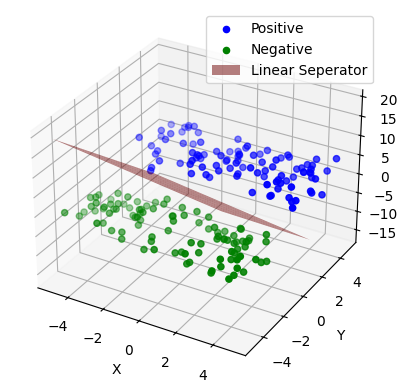

In [17]:
build3DPlot(data)